In [214]:
# import Kirill as study_pal
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

import statsmodels.api as sm
import statsmodels
from scipy import stats
%matplotlib inline

In [2]:
cd ../data/week2/

/data/week2


In [10]:
p = pd.read_csv('ppv_data.csv')
for col in p:
    print(col)
    print(np.sort(p[col].unique()))
    print( )

monk
[1 2 3 4 5 6 7 8]

session
[  1   2   3   4   5   6   7   8   9  10  11  12  13  14  15  16  17  18
  19  20  21  22  23  24  25  26  27  28  29  30  31  32  33  34  35  36
  37  38  39  40  41  42  43  44  45  46  47  48  49  50  51  52  53  54
  55  56  57  58  59  60  61  62  63  64  65  66  67  68  69  70  71  72
  73  74  75  76  77  78  79  80  81  82  83  84  85  86  87  88  89  90
  91  92  93  94  95  96  97  98  99 100 101 102 103 104 105 106 107 108
 109 110 111 112 113 114 115 116 117 118 119 120 121 122 123 124 125 126
 127 128 129 130 131 132 133 134 135 136 137 138 139 140 141 142 143 144
 145 146 147 148 149 150 151 152 153 154 155 156 157 158 159 160 161 162
 163 164 165 166 167 168 169 170 171 172 173 174 175 176 177 178 179 180
 181 182 183 184 185 186 187 188 189 190 191 192 193 194 195 196 197 198
 199 200 201 202 203 204 205 206]

piccat
[1 2 3 4]

dv
[-170 -169 -125 -120 -100  -80  -70  -60  -50  -40  -30  -25  -20  -10
    0   10   20   25   30   40   50   

In [9]:
p['piccat'] = p['piccat'].astype("category")
p

,monk,session,piccat,dv,Nimg,Ntot,sessdate
0,1,1,1,-20,0,24,2008-03-15
1,1,1,2,-20,13,24,2008-03-15
2,1,1,3,-20,2,24,2008-03-15
3,1,1,4,-20,11,24,2008-03-15
4,1,1,1,-10,10,24,2008-03-15
...,...,...,...,...,...,...,...
3101,8,206,3,30,30,32,2009-02-04
3102,8,199,4,30,21,32,2007-10-12
3103,8,202,4,30,33,33,2007-11-05
3104,8,203,4,30,33,34,2007-11-07


In [22]:
# subsetting
sub = p[(p['session'] == 9) & (p['piccat'] == 4)]
sub = sub[ sub.Ntot != 0 ]
sub

,monk,session,piccat,dv,Nimg,Ntot,sessdate
175,1,9,4,-120,2,21,2008-03-28
183,1,9,4,-40,7,30,2008-03-28
187,1,9,4,0,15,32,2008-03-28
191,1,9,4,40,25,30,2008-03-28
199,1,9,4,120,18,20,2008-03-28


In [26]:
# examining
sub['perc'] = sub.Nimg / sub.Ntot
sub['Nimgnot'] = sub.Ntot - sub.Nimg
sub

,monk,session,piccat,dv,Nimg,Ntot,sessdate,perc,Nimgnot
175,1,9,4,-120,2,21,2008-03-28,0.095238,19
183,1,9,4,-40,7,30,2008-03-28,0.233333,23
187,1,9,4,0,15,32,2008-03-28,0.468750,17
191,1,9,4,40,25,30,2008-03-28,0.833333,5
199,1,9,4,120,18,20,2008-03-28,0.900000,2


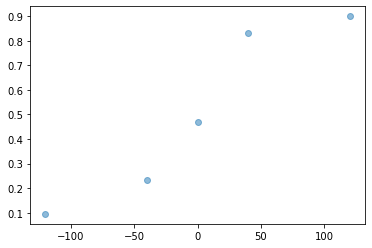

In [24]:
plt.scatter(sub.dv, sub.perc, alpha=0.5)

In [84]:
# fitting model
# when p=1/2, V_image = b1/b2

t = sub.Nimg.tolist(), sub.Nimgnot.tolist()
endog = np.asarray(t).T
exog = sm.add_constant(sub.dv)

glm_binom = sm.GLM(endog, exog, family=sm.families.Binomial())
res = glm_binom.fit()
print(res.summary())

                 Generalized Linear Model Regression Results                  
Dep. Variable:           ['y1', 'y2']   No. Observations:                    5
Model:                            GLM   Df Residuals:                        3
Model Family:                Binomial   Df Model:                            1
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -9.7379
Date:                Thu, 25 Feb 2021   Deviance:                       3.6799
Time:                        20:33:41   Pearson chi2:                     3.69
No. Iterations:                     5                                         
Covariance Type:            nonrobust                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0421      0.212      0.199      0.8

In [121]:
dv_seq = np.linspace(-150,150,30001)
exog_pred = sm.add_constant(dv_seq)

pred = res.get_prediction(exog=exog_pred, exposure=None, offset=None, transform=True, linear=False, row_labels=None)
pred.summary_frame()

,mean,mean_se,mean_ci_lower,mean_ci_upper
0,0.030527,0.020422,0.008077,0.108549
1,0.030533,0.020426,0.008079,0.108564
2,0.030540,0.020429,0.008082,0.108579
3,0.030547,0.020432,0.008084,0.108593
4,0.030554,0.020435,0.008087,0.108608
...,...,...,...,...
29996,0.971846,0.019137,0.897584,0.992699
29997,0.971852,0.019134,0.897598,0.992701
29998,0.971859,0.019131,0.897612,0.992703
29999,0.971865,0.019128,0.897626,0.992705


log( p / (1-p) ) = b1 + b2 * dv  
thus  
p = 1 - 1 / ( 1 + 10**(b1 + b2 * dv) )  
compared with model prediction, turns out it's ln, not log  
p = 1 - 1 / ( 1 + exp(b1 + b2 * dv) )  

In [132]:
b1 = res.params.const
b2 = res.params.dv
p_seq = 1 - 1 / ( 1 + np.exp(b1 + b2 * dv_seq) )
p_pred = pred.summary_frame()['mean']

/opt/conda/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/opt/conda/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


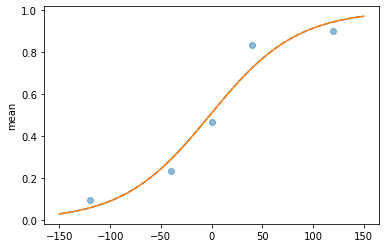

In [140]:
plt.scatter(sub.dv, sub.perc, alpha=0.5)
sns.lineplot(dv_seq, p_seq)
ax = sns.lineplot(dv_seq, p_pred)
ax.lines[0].set_linestyle("--")

In [250]:
def test(sub):
    if len(sub) < 2:
        return None    

    try:
        sub = sub[ sub.Ntot != 0 ]
        sub['Nimgnot'] = sub.Ntot - sub.Nimg

        t = sub.Nimg.tolist(), sub.Nimgnot.tolist()
        endog = np.asarray(t).T
        exog = sm.add_constant(sub.dv)
        glm_binom = sm.GLM(endog, exog, family=sm.families.Binomial())
        res = glm_binom.fit()
        
        try:
            b1 = res.params[0]
            b2 = res.params[1]
            v_image = b1/b2
        except IndexError:
            return None
        
        return v_image

    except statsmodels.tools.sm_exceptions.PerfectSeparationError:
        return None

In [253]:
values = p.groupby(by=['session','piccat']).apply(lambda x: test(x)).reset_index()

/opt/conda/lib/python3.7/site-packages/statsmodels/regression/_tools.py:121: RuntimeWarning: divide by zero encountered in double_scalars
  scale = np.dot(wresid, wresid) / df_resid
/opt/conda/lib/python3.7/site-packages/statsmodels/regression/_tools.py:121: RuntimeWarning: invalid value encountered in double_scalars
  scale = np.dot(wresid, wresid) / df_resid
/opt/conda/lib/python3.7/site-packages/statsmodels/regression/_tools.py:121: RuntimeWarning: invalid value encountered in double_scalars
  scale = np.dot(wresid, wresid) / df_resid
/opt/conda/lib/python3.7/site-packages/statsmodels/regression/_tools.py:121: RuntimeWarning: divide by zero encountered in double_scalars
  scale = np.dot(wresid, wresid) / df_resid
/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:32: RuntimeWarning: divide by zero encountered in double_scalars
/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:32: RuntimeWarning: divide by zero encountered in double_scalars
/opt/conda/lib/python3

In [271]:
value_thres = values[np.abs(values[0]) <= 1000].reset_index()
value_thres[['piccat',0]].groupby('piccat').describe()

0                                                                  \
        count      mean        std         min        25%       50%       75%   
piccat                                                                          
1       183.0  1.308273  64.849138 -409.965325 -11.304218 -0.602987  8.784650   
2       191.0 -6.032804  58.733719 -426.985761 -11.964202 -1.426786  9.208569   
3       179.0  3.113935  56.425037 -246.925496 -10.752397 -1.000212  9.885992   
4       183.0  5.537419  79.323840 -398.307991  -9.573625  0.908713  9.864004   

                    
               max  
piccat              
1       474.189785  
2       214.345841  
3       427.320353  
4       798.047891

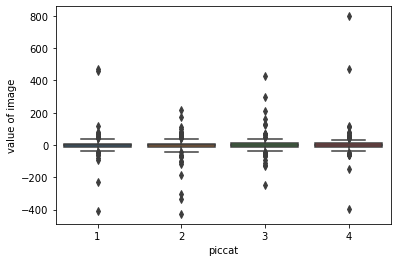

In [276]:
ax = sns.boxplot(x="piccat", y=0, data=value_thres)
ax.set(ylabel='value of image');